In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
from os.path import exists, join, basename, splitext

import random
import PIL
import torchvision
import cv2
import numpy as np
import torch
torch.set_grad_enabled(False)
  
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

In [ ]:
image_crop = PIL.Image.open("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_detect_img/image_crop_ph12.jpg")

In [ ]:
width, height = image_crop.size
print(width, height)

# im = Image.open('image_crop.jpg') # Can be many different formats.
pix = image_crop.load()
print(image_crop.size)  # Get the width and hight of the image for iterating over
# print(pix[516,1035])  # Get the RGBA Value of the a pixel of an image
#pix[0,0] = value # Set the RGBA Value of the image (tuple)
#im.save('alive_parrot.png')  # Save the modified pixels as .png

539 1018
(539, 1018)


(1018, 539, 3)
3
[R=175.4,  G=135.9, B=28.2 ]


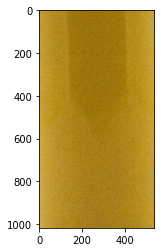

In [ ]:
from PIL import Image
import numpy as np
from tabulate import tabulate
import os

arr_image_crop = np.array(image_crop)
print(arr_image_crop.shape)   #calculating the dimension for each array
print(arr_image_crop.ndim)    #calculating the shape for each array
plt.imshow(arr_image_crop)

arr_mean = np.mean(arr_image_crop, axis=(0,1))
len(arr_mean) == 3 #RGB CASE
print(f'[R={arr_mean[0]:.1f},  G={arr_mean[1]:.1f}, B={arr_mean[2]:.1f} ]')

In [ ]:
arr_mean_2 = np.mean(arr_mean, axis=(0))
print(int(arr_mean_2))

113


(1018, 539)
2
108.11392704965537


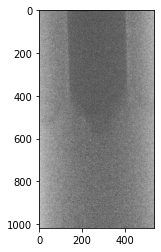

In [ ]:
# image grayscale
def imgtogray(input_img):
    gray_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    return gray_img

gray_arr_img_crop = imgtogray(arr_image_crop) 
plt.imshow(gray_arr_img_crop, 'gray')
print(gray_arr_img_crop.shape)
print(gray_arr_img_crop.ndim)
plt.imshow(gray_arr_img_crop, 'gray')

gray_arr_mean = np.mean(gray_arr_img_crop, axis=(0,1))
print(gray_arr_mean)

### crop >mean or <mean image

In [ ]:
arr_mean_2 = np.mean(arr_mean, axis=(0))
print(int(arr_mean_2))

113


0 0
crop_mean:  131
0 32
crop_mean:  123
0 64
crop_mean:  116
0 96
crop_mean:  115
0 416
crop_mean:  114
0 448
crop_mean:  119
0 480
crop_mean:  130
32 0
crop_mean:  132
32 32
crop_mean:  123
32 64
crop_mean:  117
32 96
crop_mean:  114
32 416
crop_mean:  114
32 448
crop_mean:  120
32 480
crop_mean:  130
64 0
crop_mean:  133
64 32
crop_mean:  123
64 64
crop_mean:  115
64 96
crop_mean:  114
64 416
crop_mean:  115
64 448
crop_mean:  120
64 480
crop_mean:  130
96 0
crop_mean:  133
96 32
crop_mean:  124
96 64
crop_mean:  115
96 96
crop_mean:  113
96 416
crop_mean:  116
96 448
crop_mean:  120
96 480
crop_mean:  129
128 0
crop_mean:  132
128 32
crop_mean:  125
128 64
crop_mean:  116
128 96
crop_mean:  113
128 416
crop_mean:  114
128 448
crop_mean:  119
128 480
crop_mean:  129
160 0
crop_mean:  133
160 32
crop_mean:  124
160 64
crop_mean:  116
160 96
crop_mean:  114
160 416
crop_mean:  114
160 448
crop_mean:  119
160 480
crop_mean:  129
192 0
crop_mean:  133
192 32
crop_mean:  123
192 64
crop_

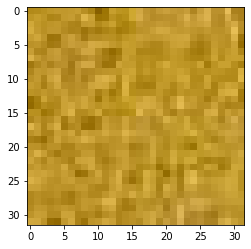

In [ ]:
count = 0

for h in range(0, height-32, 32):   
  for w in range (0, width-32, 32):    
    img_crop_test4 = image_crop.crop(( w, h, w+32, h+32 ))
    arr_img_crop_test4 = np.array(img_crop_test4)
    # print(img_crop_test4)
    arr_mean_test4 = np.mean(img_crop_test4, axis=(0,1))
    # print(f'[R={arr_mean_test4[0]:.1f},  G={arr_mean_test4[1]:.1f}, B={arr_mean_test4[2]:.1f} ]')

    arr_mean_test4_2 = np.mean(arr_mean_test4, axis=(0))
    # print('crop_mean: ', int(arr_mean_test4_2))


    if int(arr_mean_test4_2) >= int(arr_mean_2):
      print(h, w)
      print('crop_mean: ', int(arr_mean_test4_2))
      count = count + 1
      img_crop_test4.save("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32_sidearea/12/ph12_" + str(count) + ".jpg")
    
    
    # img_crop_test4.save("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_56*56/12/ph3_" + str(count) + ".jpg")
    # cv2.imwrite(f'content/cropimage/test_{0:04}.png',arr_img_crop_test4)
    # print(img_crop_test.size)
    # plt.imshow(img_crop_test4)
    # print(img_crop_test4.size)

    # print(h, w)
    # count = count + 1

plt.imshow(img_crop_test4)
print('original mean:' ,int(arr_mean_2))

### crop all

In [ ]:
count = 0

for h in range(0, height-32, 32):   
  for w in range (0, width-32, 32):    
    img_crop_test4 = image_crop.crop(( w, h, w+32, h+32 ))
    arr_img_crop_test4 = np.array(img_crop_test4)
    # print(img_crop_test4)
    arr_mean_test4 = np.mean(img_crop_test4, axis=(0,1))
    print(f'[R={arr_mean_test4[0]:.1f},  G={arr_mean_test4[1]:.1f}, B={arr_mean_test4[2]:.1f} ]')
   


    img_crop_test4.save("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_PEPE/PEPE_crop_image_32*32//ph2_" + str(count) + ".jpg")
    # img_crop_test4.save("/content/gdrive/MyDrive/中興大學/花青素多色樣品色彩分析/Code/Class_LPE__calibrated/LPE_crop_image_56*56/12/ph3_" + str(count) + ".jpg")
    # cv2.imwrite(f'content/cropimage/test_{0:04}.png',arr_img_crop_test4)
    # print(img_crop_test.size)
    # plt.imshow(img_crop_test4)
    # print(img_crop_test4.size)

    print(h, w)
    count = count + 1
plt.imshow(img_crop_test4)

### testing

[R=156.3,  G=118.0, B=28.2 ]
95


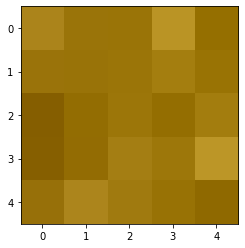

In [ ]:
img_crop_test = image_crop.crop(( 250, 100, 250+5, 100+5 )) 
plt.imshow(img_crop_test)


arr_mean_test = np.mean(img_crop_test, axis=(0,1))
print(f'[R={arr_mean_test[0]:.1f},  G={arr_mean_test[1]:.1f}, B={arr_mean[2]:.1f} ]')

arr_mean_test_2 = np.mean(arr_mean_test, axis=(0))
print(int(arr_mean_test_2))

(5, 5)
2
[156 153 135 116 113] [148 155 150 133 121] [135 141 154 159 151]
139.96


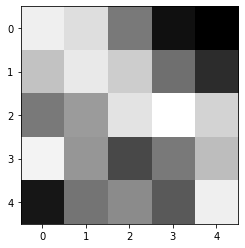

In [ ]:
arr_img_crop_test = np.array(img_crop_test)

# image grayscale
def imgtogray(input_img):
    gray_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    return gray_img

gray_arr_img_crop_test = imgtogray(arr_img_crop_test) 
plt.imshow(gray_arr_img_crop_test, 'gray')
print(gray_arr_img_crop_test.shape)
print(gray_arr_img_crop_test.ndim)

gray_arr_mean_test = np.mean(gray_arr_img_crop_test, axis=(0,1))
print(gray_arr_img_crop_test[0],  gray_arr_img_crop_test[1], gray_arr_img_crop_test[2],)
print(gray_arr_mean_test)

[R=166.6,  G=128.8, B=19.3 ]
104


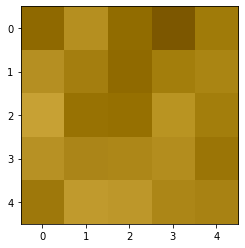

In [ ]:
img_crop_test2 = image_crop.crop(( 200, 800, 200+5, 800+5 )) 
plt.imshow(img_crop_test2)


arr_mean_test2 = np.mean(img_crop_test2, axis=(0,1))
print(f'[R={arr_mean_test2[0]:.1f},  G={arr_mean_test2[1]:.1f}, B={arr_mean_test2[2]:.1f} ]')

arr_mean_test2_2 = np.mean(arr_mean_test2, axis=(0))
print(int(arr_mean_test2_2))

(5, 5)
2
[147 134 130 137 136] [127 120 120 126 123] [123 124 130 135 133]
130.72


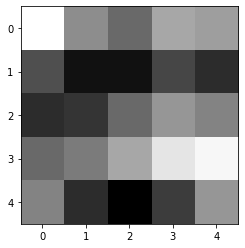

In [ ]:
arr_img_crop_test2 = np.array(img_crop_test2)

# image grayscale
def imgtogray(input_img):
    gray_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    return gray_img

gray_arr_img_crop_test2 = imgtogray(arr_img_crop_test2) 
plt.imshow(gray_arr_img_crop_test2, 'gray')
print(gray_arr_img_crop_test2.shape)
print(gray_arr_img_crop_test2.ndim)

gray_arr_mean_test2 = np.mean(gray_arr_img_crop_test2, axis=(0,1))
print(gray_arr_img_crop_test2[0],  gray_arr_img_crop_test2[1], gray_arr_img_crop_test2[2],)
print(gray_arr_mean_test2)

(5, 5, 3)
(3,)
[R=193.3,  G=153.8, B=53.8 ]
133


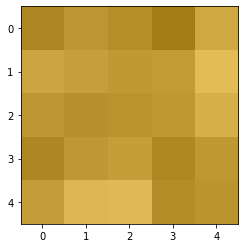

In [ ]:
img_crop_test3 = image_crop.crop(( 0, 0, 0+5, 0+5 )) 
plt.imshow(np.array(img_crop_test3))

# a = np.array(img_crop_test3[0])
print(np.array(img_crop_test3).shape)
arr_mean_test3 = np.mean(img_crop_test3, axis=(0,1))
print(arr_mean_test3.shape)
print(f'[R={arr_mean_test3[0]:.1f},  G={arr_mean_test3[1]:.1f}, B={arr_mean_test3[2]:.1f} ]')

arr_mean_test3_2 = np.mean(arr_mean_test3, axis=(0))
print(int(arr_mean_test3_2))

(5, 5)
2
[143 164 174 159 164] [145 150 153 145 159] [143 140 145 144 158]
152.48


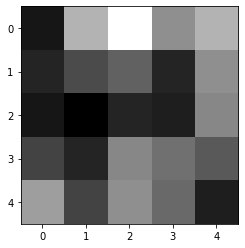

In [ ]:
arr_img_crop_test3 = np.array(img_crop_test3)

# image grayscale
def imgtogray(input_img):
    gray_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    return gray_img

gray_arr_img_crop_test3 = imgtogray(arr_img_crop_test3) 
plt.imshow(gray_arr_img_crop_test3, 'gray')
print(gray_arr_img_crop_test3.shape)
print(gray_arr_img_crop_test3.ndim)

gray_arr_mean_test3 = np.mean(gray_arr_img_crop_test3, axis=(0,1))
print(gray_arr_img_crop_test3[0],  gray_arr_img_crop_test3[1], gray_arr_img_crop_test3[2],)
print(gray_arr_mean_test3)